In [1]:
import pandas as pd

df1 = pd.read_csv("dataset_grupo1.csv", encoding="latin1", sep=";")
df2 = pd.read_csv("dataset2_grupo1.csv", encoding="latin1", sep=";")
df3 = pd.read_csv("dataset3_grupo1.csv", encoding="latin1", sep=";")

#Dados = planilhona com todas as info
dados = df1.merge(df2, on="Data").merge(df3, on="Data")

print(dados.head())


dados.to_csv("dataset_unificado.csv", index=False, encoding="utf-8-sig")

#conferindo os dados:
print(dados.isnull().sum())
#não há n.a values
print(dados['Data'].value_counts().sort_index())

#aparentemente tudo certo :)
dados.head()

      Data  \
0  12/2006   
1  01/2007   
2  02/2007   
3  03/2007   
4  04/2007   

  433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal  \
0                                              0,48                            
1                                              0,44                            
2                                              0,44                            
3                                              0,37                            
4                                              0,25                            

  3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$  \
0                                            2,1372                                                 
1                                            2,1239                                                 
2                                            2,1174                                                 
3                             

,Data,433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal,3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$,4380 - PIB mensal - Valores correntes (R$ milhões) - R$ (milhões),4469 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governo Federal - R$ (milhões),4470 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Banco Central - R$ (milhões),4472 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governos estaduais - R$ (milhões),4473 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governos municipais - R$ (milhões),13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões),13762 - Dívida bruta do governo geral (% PIB) - Metodologia utilizada a partir de 2008 - %,"13763 - Dívida bruta do governo geral - Saldos em US$ milhões - Metodologia utilizada a partir de 2008 - US$ (milhões),,,,,,,,,,",4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a.,"4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,","29037 - Endividamento das famílias com o Sistema Financeiro Nacional em relação à renda acumulada dos últimos doze meses (RNDBF) - %,"
0,12/2006,"0,48","2,1372","215.338,3","727.318,55","8.481,33","316.863,54","47.073,27","1.336.644,90","55,48","625.418,73","13,19","0,99","21,98"
1,01/2007,"0,44","2,1239","206.662,3","739.728,91","-4.509,71","316.460,09","46.447,36","1.367.451,91","56,17","643.840,6","13,13","1,8","22,28"
2,02/2007,"0,44","2,1174","201.552,1","747.648,62","-4.194,13","317.158,09","46.653,24","1.399.083,71","56,90","660.755,51","12,93","0,87","22,48"
3,03/2007,"0,37","2,0496","223.208,6","750.319,85","5.830,79","316.163,14","46.477,56","1.423.273,45","57,24","694.415,23","12,74","1,5","22,4"
4,04/2007,"0,25","2,0331","218.931,2","745.927,20","7.990,12","314.070,80","46.673,09","1.438.854,85","57,17","707.714,75","12,58","0,94","22,36"


/tmp/ipykernel_2856/2286414392.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)


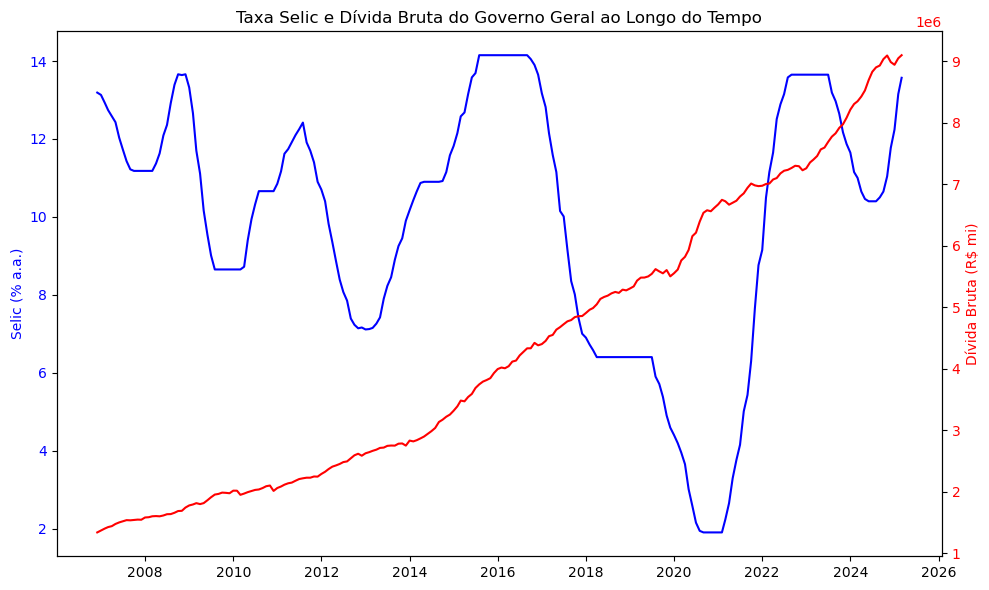

In [2]:
import matplotlib.pyplot as plt

#Taxa SELIC e Dívida Bruta
dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

dados["Selic (% a.a.)"] = dados["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."].str.replace(",", ".").astype(float)
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)

fig, ax1 = plt.subplots(figsize=(10, 6))

#Eixo Selic
ax1.plot(dados["Data"], dados["Selic (% a.a.)"], color='blue', label="Selic (% a.a.)")
ax1.set_ylabel("Selic (% a.a.)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

#Eixo da Dívida
ax2 = ax1.twinx()
ax2.plot(dados["Data"], dados["Dívida Bruta (R$ mi)"], color='red', label="Dívida Bruta (R$ milhões)")
ax2.set_ylabel("Dívida Bruta (R$ mi)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Taxa Selic e Dívida Bruta do Governo Geral ao Longo do Tempo")
fig.tight_layout()
plt.show()

In [3]:
#relação entre o crescimento da dívida do governo e as variações da selic
import pandas as pd

dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

dados["Selic (% a.a.)"] = dados["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."].str.replace(",", ".").astype(float)
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)

dados["Dívida Aumento (R$ mi)"] = dados["Dívida Bruta (R$ mi)"].diff()

dados = dados.dropna(subset=["Dívida Aumento (R$ mi)"])

correlacao = dados["Selic (% a.a.)"].corr(dados["Dívida Aumento (R$ mi)"])

print(correlacao)

-0.05568478790529951


/tmp/ipykernel_2856/3688410708.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Converter para float (mantendo nomes originais das colunas)
dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"] = dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"].str.replace(",", ".").astype(float)
dados["433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal"] = dados["433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal"].str.replace(",", ".").astype(float)

# Calcular a correlação
correlacao_selic_ipca = dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"].corr(
    dados["433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal"]
)
print(correlacao_selic_ipca)


-0.04345195092591911


In [5]:
#correlação e rquadrado
correlacao = dados["Selic (% a.a.)"].corr(dados["Dívida Bruta (R$ mi)"])
print(correlacao)
rquadrado = correlacao ** 2
print(rquadrado)
#resultado tá bem baixo, imagino que tenham outros fatores que estejam no meio dificultando a análise

-0.17354908965195615
0.030119286519022712


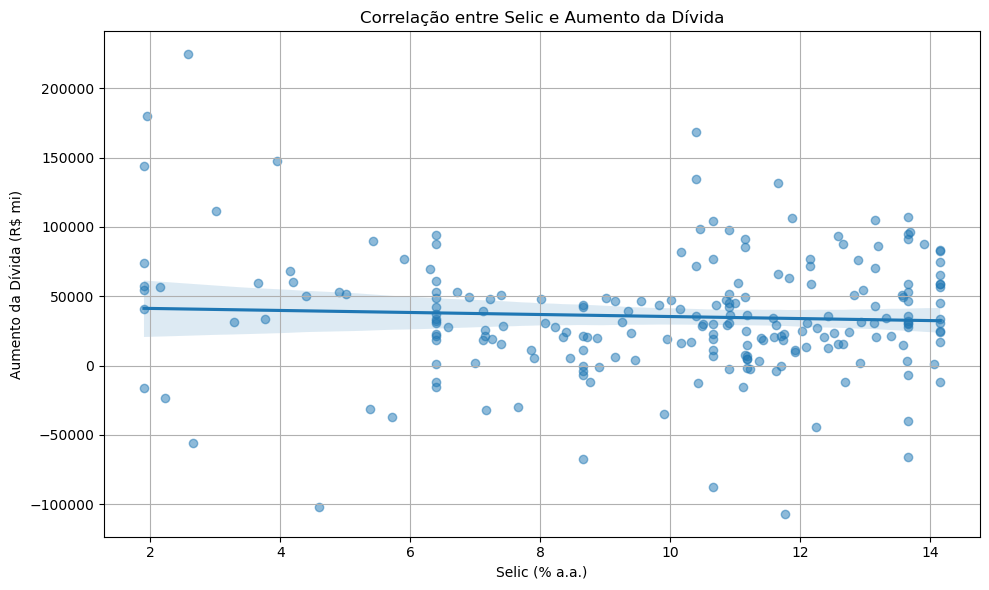

In [6]:
#é a mesma correlação do heatmap, mas fiz em outro tipo de graph.

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x="Selic (% a.a.)", y="Dívida Aumento (R$ mi)", data=dados, scatter_kws={"alpha":0.5})
plt.title("Correlação entre Selic e Aumento da Dívida")
plt.xlabel("Selic (% a.a.)")
plt.ylabel("Aumento da Dívida (R$ mi)")
plt.grid(True)
plt.tight_layout()
plt.show()


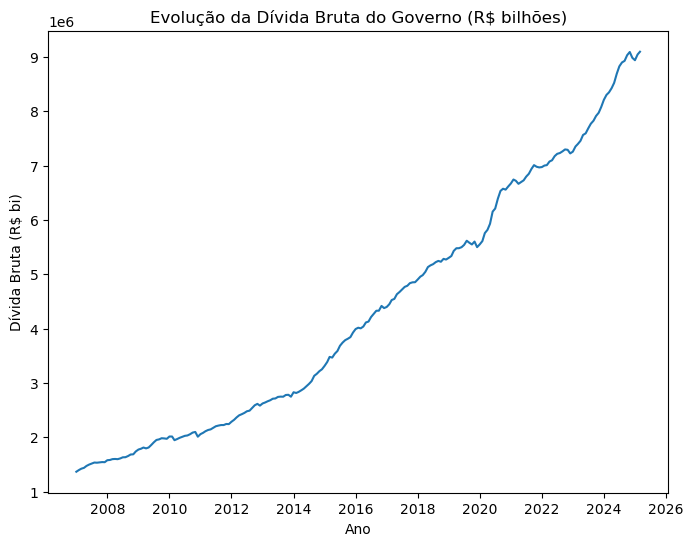

In [7]:
#crescimento Dívida Bruta em linhas, gráfico legal pra introduzir

plt.figure(figsize=(8,6))
sns.lineplot(data=dados, x="Data", y="Dívida Bruta (R$ mi)")
plt.title("Evolução da Dívida Bruta do Governo (R$ bilhões)")
plt.xlabel("Ano")
plt.ylabel("Dívida Bruta (R$ bi)")
plt.show()



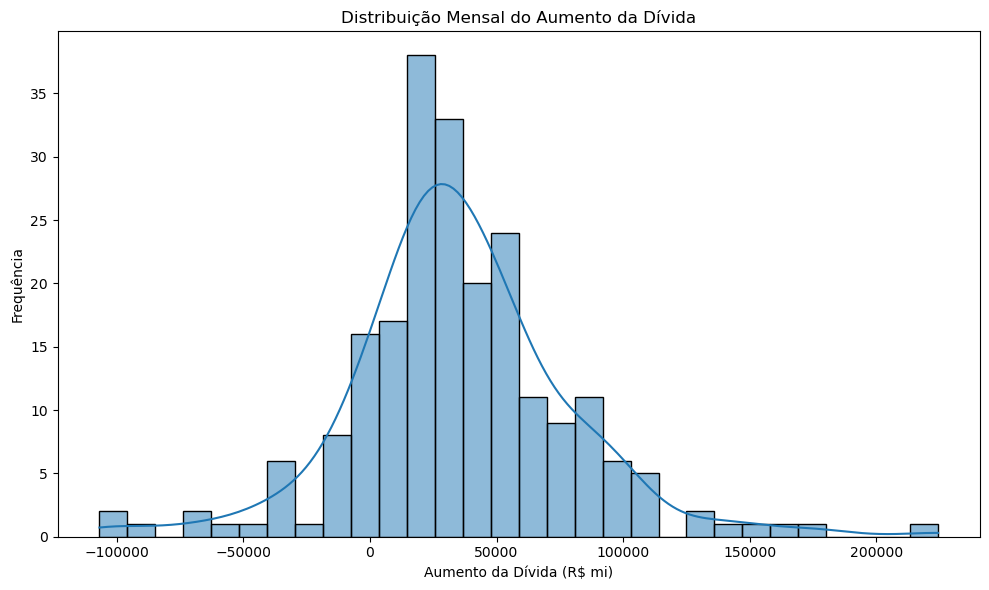

In [8]:
#histograma

plt.figure(figsize=(10, 6))
sns.histplot(dados["Dívida Aumento (R$ mi)"], bins=30, kde=True)
plt.title("Distribuição Mensal do Aumento da Dívida")
plt.xlabel("Aumento da Dívida (R$ mi)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


/tmp/ipykernel_2856/4156703288.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=dados, x="Evento_Econômico", y="Dívida Aumento (R$ mi)", estimator=np.mean, ci=None)


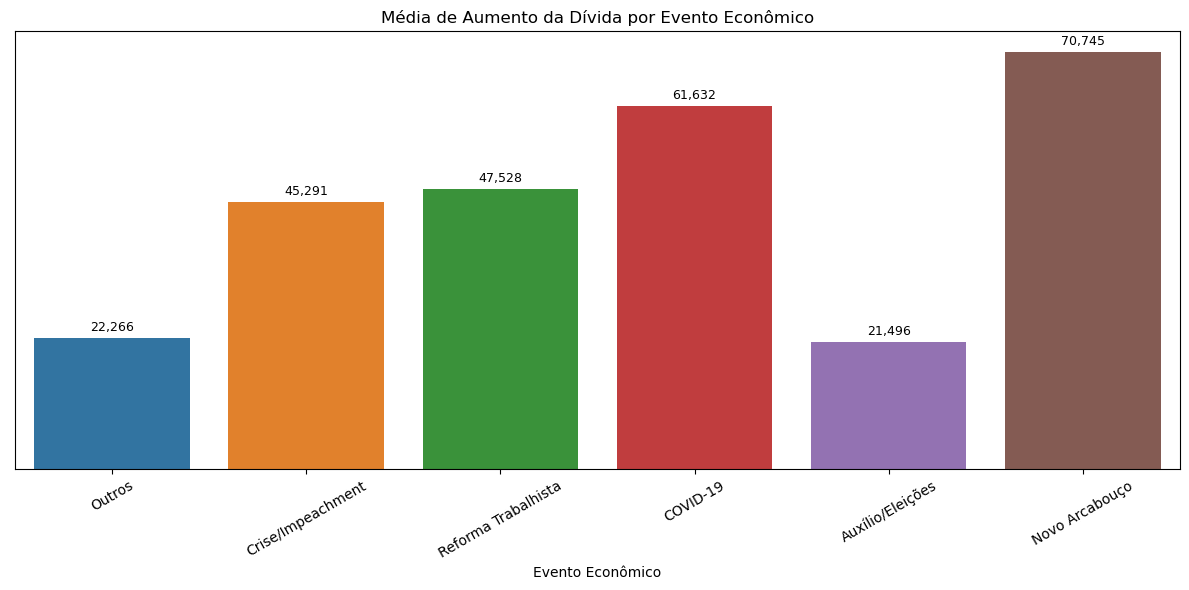

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evento(data):
    if pd.Timestamp("2014-01-01") <= data <= pd.Timestamp("2016-12-31"):
        return "Crise/Impeachment"
    elif pd.Timestamp("2017-07-01") <= data <= pd.Timestamp("2017-07-31"):
        return "Reforma Trabalhista"
    elif pd.Timestamp("2020-03-01") <= data <= pd.Timestamp("2021-12-31"):
        return "COVID-19"
    elif pd.Timestamp("2022-01-01") <= data <= pd.Timestamp("2022-12-31"):
        return "Auxílio/Eleições"
    elif data >= pd.Timestamp("2023-04-01"):
        return "Novo Arcabouço"
    else:
        return "Outros"

dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

dados["Evento_Econômico"] = dados["Data"].apply(evento)


dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"]\
    .str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)

dados["Dívida Aumento (R$ mi)"] = dados["Dívida Bruta (R$ mi)"].diff()
dados = dados.dropna(subset=["Dívida Aumento (R$ mi)"])

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dados, x="Evento_Econômico", y="Dívida Aumento (R$ mi)", estimator=np.mean, ci=None)
plt.xticks(rotation=30)
plt.title("Média de Aumento da Dívida por Evento Econômico")
plt.ylabel("")
plt.xlabel("Evento Econômico")
plt.yticks([])

#aq eu gepetei
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()



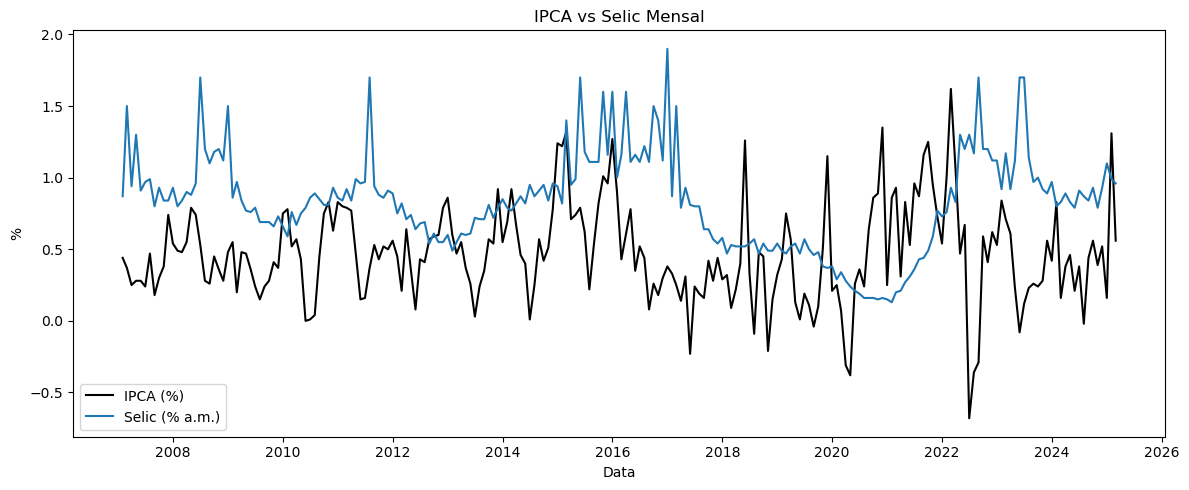

In [10]:
plt.figure(figsize=(12,5))
plt.plot(dados["Data"], dados["433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal"], label="IPCA (%)", color = "black")
plt.plot(dados["Data"], dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"], label="Selic (% a.m.)",)
plt.title("IPCA vs Selic Mensal")
plt.xlabel("Data")
plt.ylabel("%")
plt.legend()
plt.tight_layout()
plt.show()


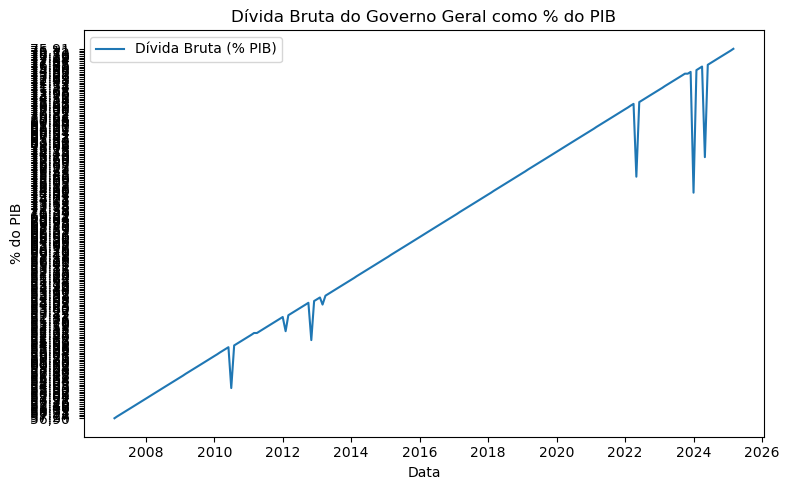

In [11]:
dados["Data"] = pd.to_datetime(dados["Data"])

plt.figure(figsize=(8,5))
plt.plot(dados["Data"], dados["13762 - Dívida bruta do governo geral (% PIB) - Metodologia utilizada a partir de 2008 - %"], label="Dívida Bruta (% PIB)")
plt.title("Dívida Bruta do Governo Geral como % do PIB")
plt.xlabel("Data")
plt.ylabel("% do PIB")
plt.legend()
plt.tight_layout()
plt.show()

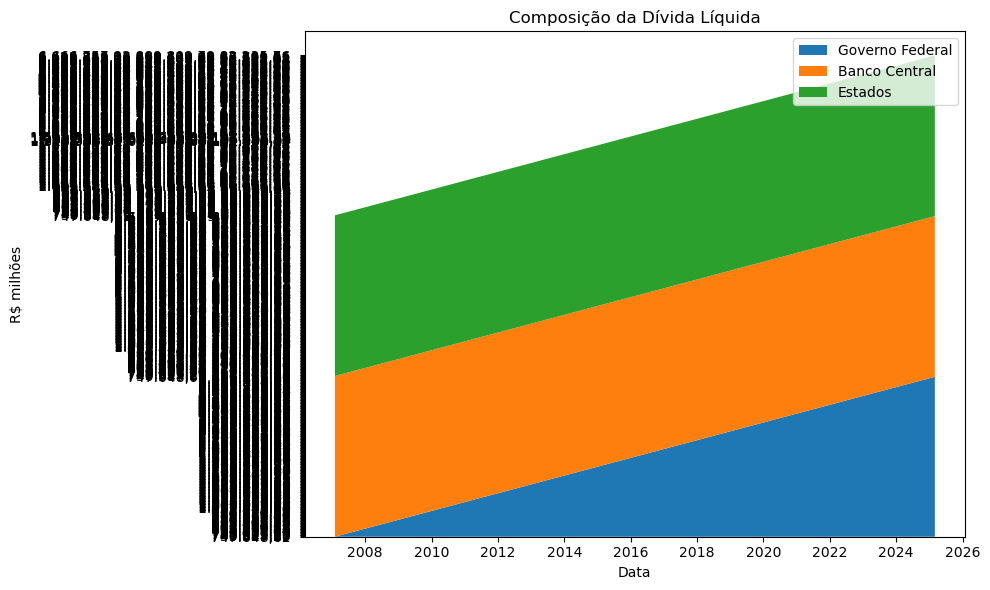

In [12]:
#vou arrumar isso mais tarde

plt.figure(figsize=(10,6))
plt.stackplot(
    dados["Data"],
    dados["4469 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governo Federal - R$ (milhões)"],
    dados["4472 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governos estaduais - R$ (milhões)"],
    dados["4473 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governos municipais - R$ (milhões)"],
    labels=["Governo Federal", "Banco Central", "Estados", "Municípios"]
)
plt.title("Composição da Dívida Líquida")
plt.xlabel("Data")
plt.ylabel("R$ milhões")
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_2856/3958338219.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


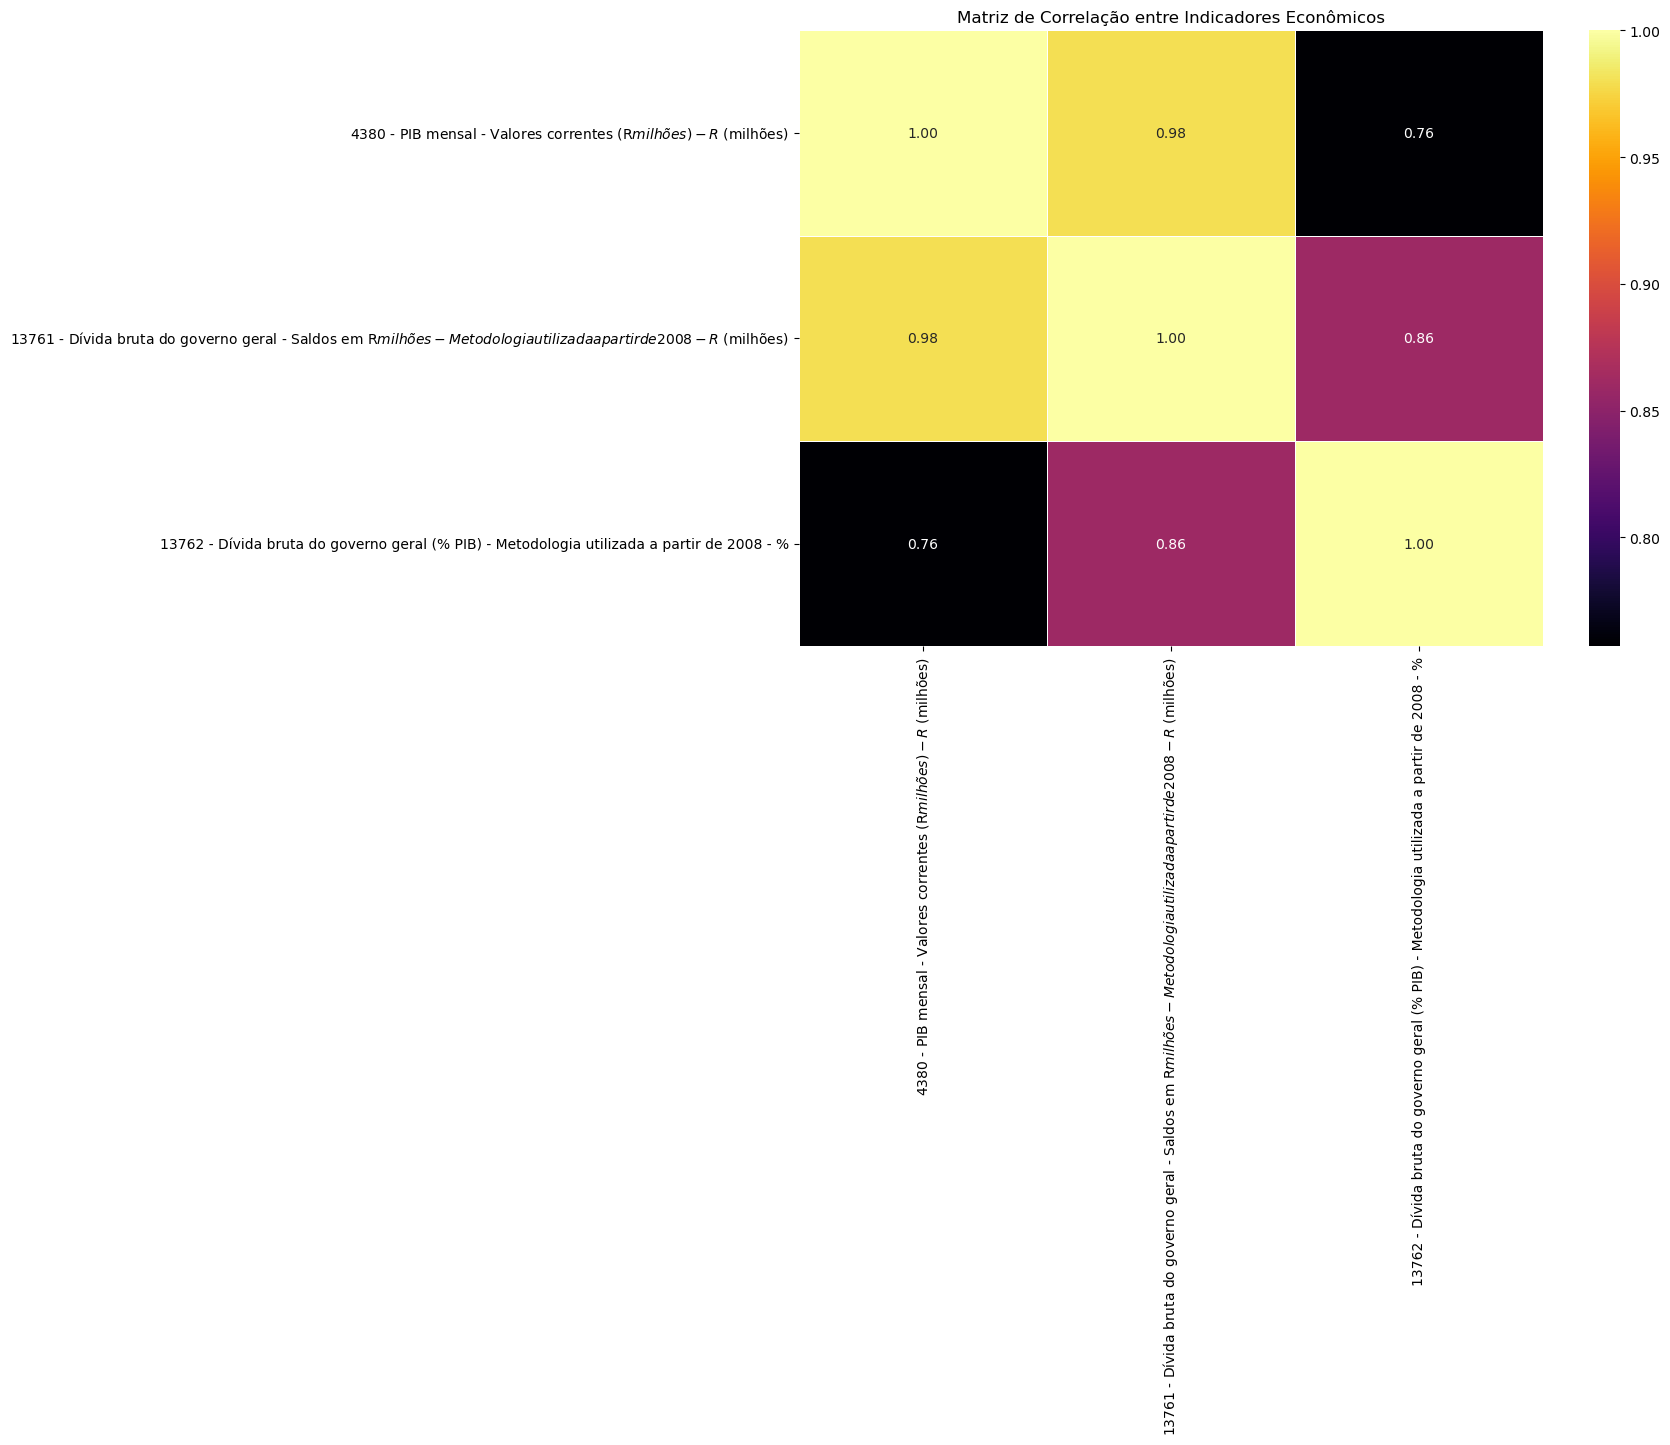

In [13]:
cols = [
    "4380 - PIB mensal - Valores correntes (R$ milhões) - R$ (milhões)",
    "13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)",
    "13762 - Dívida bruta do governo geral (% PIB) - Metodologia utilizada a partir de 2008 - %",
]

for col in cols:
    dados[col] = dados[col].astype(str).str.replace(",", ".").str.replace(".", "", regex=False).str.replace(",", ".").astype(float)

matriz = dados[cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(matriz, annot=True, fmt=".2f", cmap="inferno", linewidths=0.5)
plt.title("Matriz de Correlação entre Indicadores Econômicos")
plt.tight_layout()
plt.show()


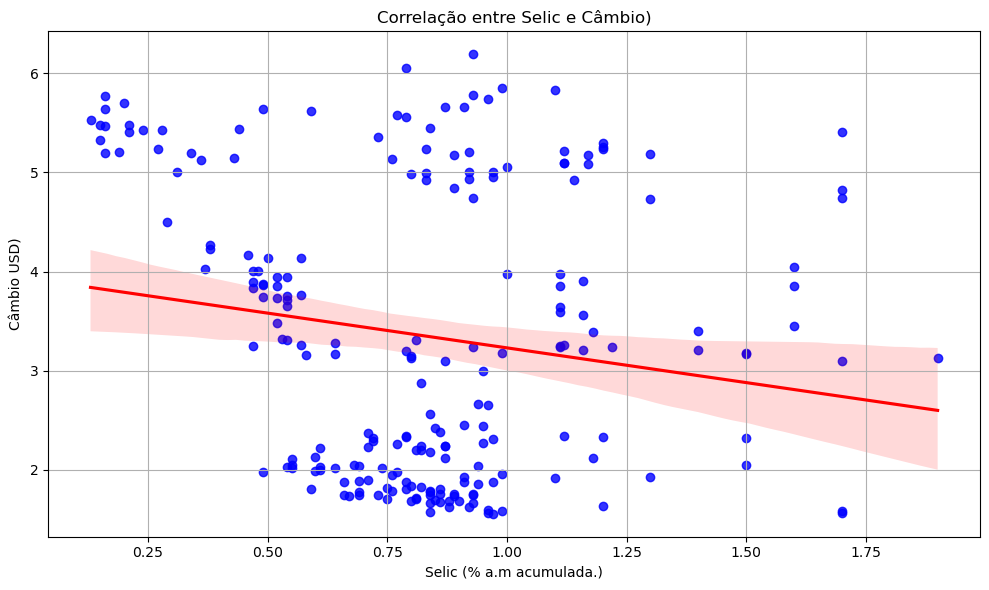

In [14]:
#refazr

import seaborn as sns
import matplotlib.pyplot as plt

dados["Selic (% a.m.)"] = dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"].astype(str).str.replace(",", ".").astype(float)
dados["Câmbio (R$/US$)"] = dados["3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$"].astype(str).str.replace(",", ".").astype(float)

plt.figure(figsize=(10, 6))
sns.regplot(
    x=dados["Selic (% a.m.)"],
    y=dados["Câmbio (R$/US$)"],
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"},
)
plt.title("Correlação entre Selic e Câmbio)")
plt.xlabel("Selic (% a.m acumulada.)")
plt.ylabel("Câmbio USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


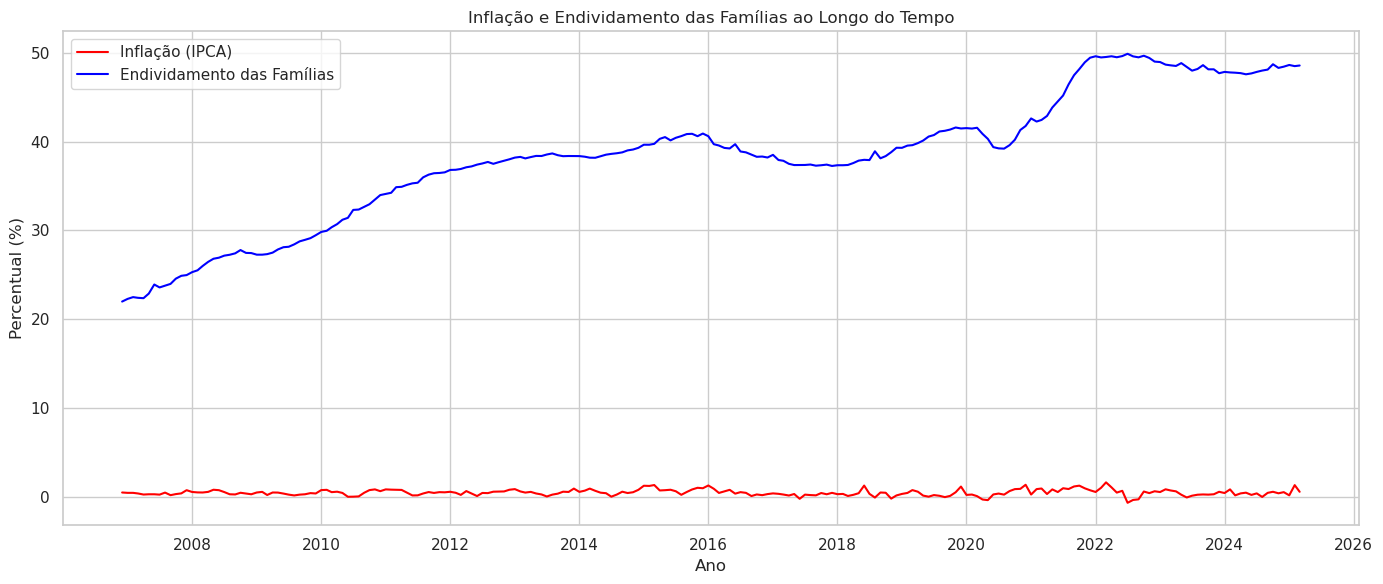

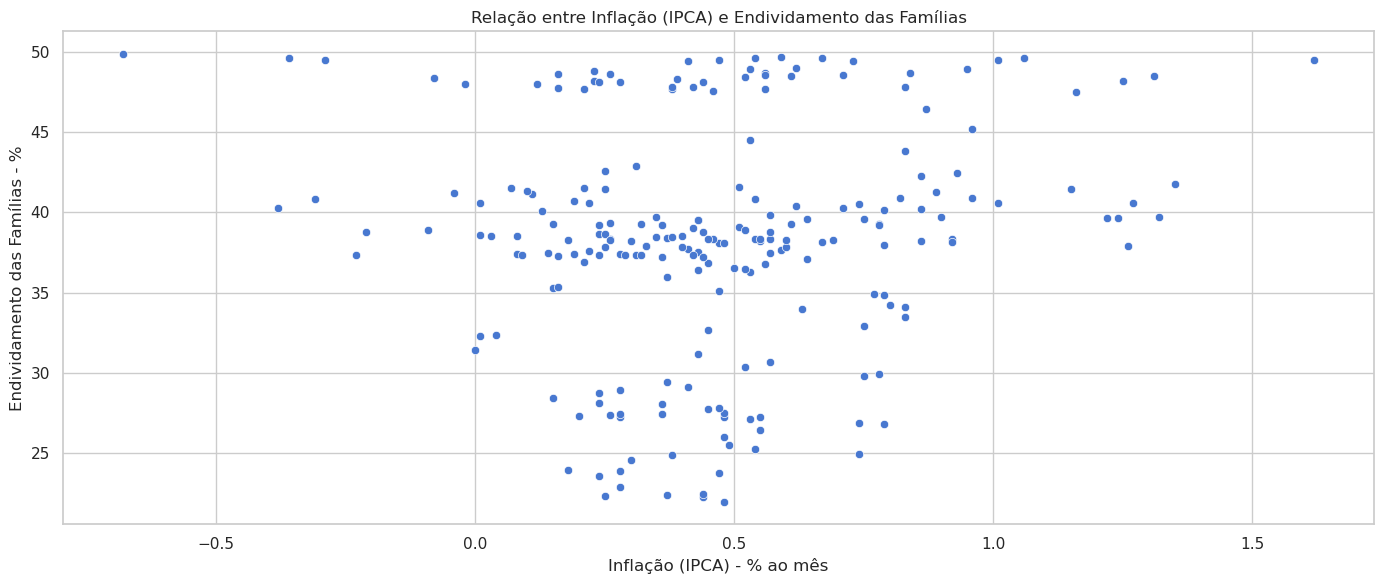


-Gráfico Temporal:

O gráfico mostra que tanto a inflação (IPCA) quanto o endividamento das famílias variam ao longo do tempo, mas não de forma obviamente sincronizada.

-Gráfico de Dispersão:

Os pontos mostram uma fraca tendência positiva, mas com muita dispersão — ou seja, não há uma relação clara e linear.

-Correlação de Pearson:

O coeficiente é ≈ 0,10, o que indica uma correlação positiva fraca entre inflação e endividamento.

Isso sugere que a inflação tem pouca influência direta sobre o nível de endividamento das famílias, ao menos de forma linear e direta.



In [15]:
import pandas as pd
dados = pd.read_csv("dataset_unificado.csv")
dados = dados.rename(columns={
    'Data': 'Data',
    '433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal': 'IPCA (%)',
    '29037 - Endividamento das famílias com o Sistema Financeiro Nacional em relação à renda acumulada dos últimos doze meses (RNDBF) - %,': 'Endividamento (%)'
})
dados['Data'] = pd.to_datetime(dados['Data'], format="%m/%Y")
dados['IPCA (%)'] = dados['IPCA (%)'].str.replace(',', '.').astype(float)
dados['Endividamento (%)'] = dados['Endividamento (%)'].str.replace(',', '.').astype(float)
dados[['Data', 'IPCA (%)', 'Endividamento (%)']].head()

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (14, 6)

# 1. Gráfico de séries temporais
plt.figure()
plt.plot(dados['Data'], dados['IPCA (%)'], label='Inflação (IPCA)', color='red')
plt.plot(dados['Data'], dados['Endividamento (%)'], label='Endividamento das Famílias', color='blue')
plt.title("Inflação e Endividamento das Famílias ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Percentual (%)")
plt.legend()
plt.tight_layout()
plt.show()

# 2. Gráfico de dispersão entre IPCA e Endividamento
plt.figure()
sns.scatterplot(data=dados, x='IPCA (%)', y='Endividamento (%)')
plt.title("Relação entre Inflação (IPCA) e Endividamento das Famílias")
plt.xlabel("Inflação (IPCA) - % ao mês")
plt.ylabel("Endividamento das Famílias - %")
plt.tight_layout()
plt.show()

# 3. Correlação de Pearson
correlation = dados['IPCA (%)'].corr(dados['Endividamento (%)'])
correlation

print("""
-Gráfico Temporal:

O gráfico mostra que tanto a inflação (IPCA) quanto o endividamento das famílias variam ao longo do tempo, mas não de forma obviamente sincronizada.

-Gráfico de Dispersão:

Os pontos mostram uma fraca tendência positiva, mas com muita dispersão — ou seja, não há uma relação clara e linear.

-Correlação de Pearson:

O coeficiente é ≈ 0,10, o que indica uma correlação positiva fraca entre inflação e endividamento.

Isso sugere que a inflação tem pouca influência direta sobre o nível de endividamento das famílias, ao menos de forma linear e direta.
""")


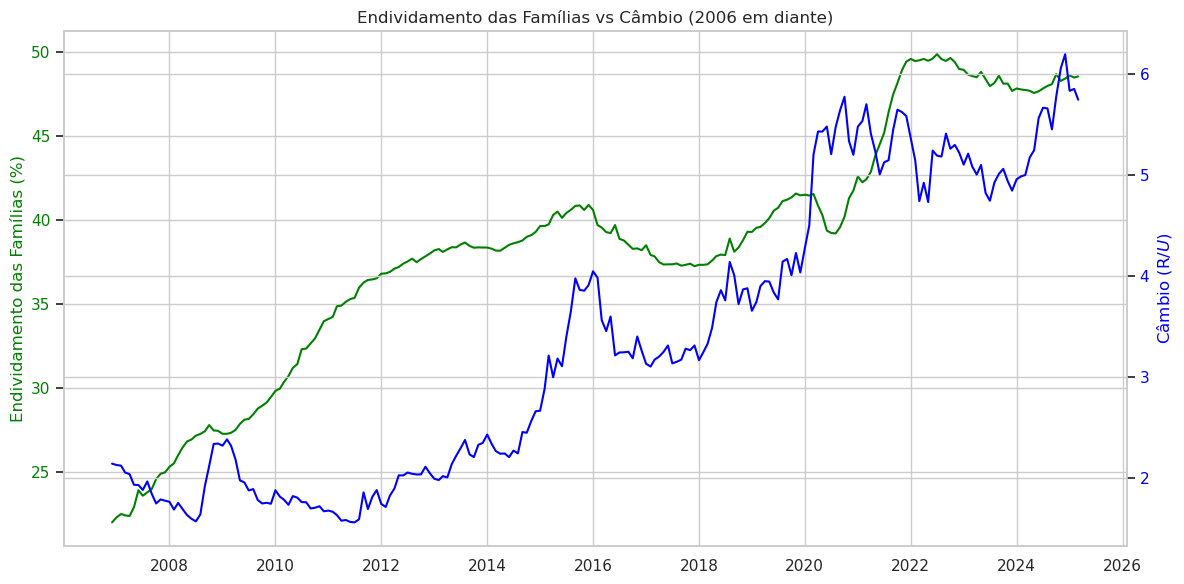

In [16]:
# Endividamento das Famílias vs Câmbio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dados = pd.read_csv("dataset_unificado.csv")

# Renomeando colunas pra facilitar
dados["Câmbio (R$/U$)"] = dados["3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$"].str.replace(",", ".").astype(float)
dados["Endividamento Famílias (%)"] = dados["29037 - Endividamento das famílias com o Sistema Financeiro Nacional em relação à renda acumulada dos últimos doze meses (RNDBF) - %,"].str.replace(",", ".").astype(float)

# Converter data, se ainda não tiver
dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

# Gráfico com dois eixos
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(dados["Data"], dados["Endividamento Famílias (%)"], color='green', label='Endividamento (%)')
ax1.set_ylabel("Endividamento das Famílias (%)", color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
ax2.plot(dados["Data"], dados["Câmbio (R$/U$)"], color='blue', label='Câmbio (R$/U$)')
ax2.set_ylabel("Câmbio (R$/U$)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("Endividamento das Famílias vs Câmbio (2006 em diante)")
fig.tight_layout()
plt.show()

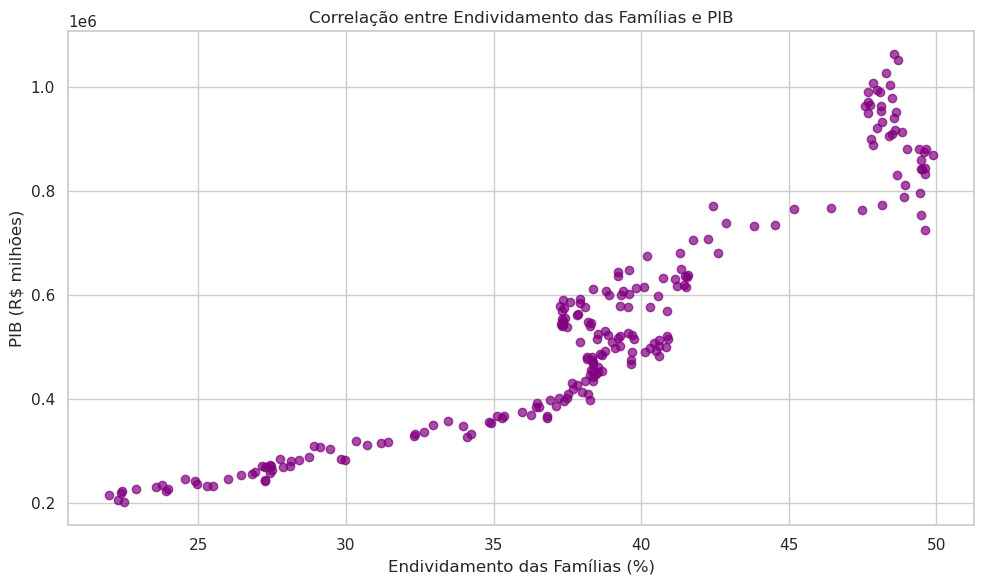

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Função para limpar strings numéricas (remove milhar e converte decimal)
def limpar_valor(valor):
    valor = str(valor).strip()             # remove espaços
    valor = valor.replace(".", "")         # remove separador de milhar
    valor = valor.replace(",", ".")        # troca vírgula decimal por ponto
    try:
        return float(valor)
    except:
        return None  # retorna None se não conseguir converter

# Carregar a base de dados
dados = pd.read_csv("dataset_unificado.csv")

# Corrigir nomes das colunas
dados.columns = dados.columns.str.strip().str.replace(",", "", regex=False)

# Aplicar limpeza nas colunas numéricas
dados["Endividamento Famílias (%)"] = dados[
    "29037 - Endividamento das famílias com o Sistema Financeiro Nacional em relação à renda acumulada dos últimos doze meses (RNDBF) - %"
].apply(limpar_valor)

dados["PIB (R$ milhões)"] = dados[
    "4380 - PIB mensal - Valores correntes (R$ milhões) - R$ (milhões)"
].apply(limpar_valor)

# Converter coluna de data
dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y", errors="coerce")

# Remover linhas com valores faltantes
dados = dados.dropna(subset=["Endividamento Famílias (%)", "PIB (R$ milhões)"])

# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(dados["Endividamento Famílias (%)"], dados["PIB (R$ milhões)"], alpha=0.7, color='purple')
plt.xlabel("Endividamento das Famílias (%)")
plt.ylabel("PIB (R$ milhões)")
plt.title("Correlação entre Endividamento das Famílias e PIB")
plt.grid(True)
plt.tight_layout()
plt.show()

